In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
df1 = pd.read_csv('Marctweetswithsenti.csv')

In [3]:
df2 = pd.read_csv('tweetswithsenti.csv')

In [4]:
df1['T2'] = [1]*len(df1)
df1['T1'] = [0]*len(df1)
df2['T1'] = [1]*len(df2)
df2['T2'] = [0]*len(df2)

In [128]:
df = df1.append(df2)

In [6]:
df.head()

,created_at,id,lang,full_text,verified,author_id,user_loc,hashtags,tweet_loc,text,sentiment,T2,T1
0,Mon Mar 01 05:00:59 +0000 2021,1366252100242477057,en,congrats to pm @narendramodi ji for taking #co...,False,255873334,New Delhi,"[{'text': 'CoronaVaccine', 'indices': [43, 57]...",NaN,congrats to pm ji for taking this will inspire...,1,1,0
1,Mon Mar 01 05:01:00 +0000 2021,1366252105716097024,en,"""coronaphobia"" is a new term that researchers ...",False,1159274155,NaN,[],NaN,coronaphobia is a new term that researchers ha...,0,1,0
2,Mon Mar 01 05:01:03 +0000 2021,1366252117221134338,en,a little information about covid-19 in pregnan...,False,1159274155,NaN,[],NaN,a little information about covid 19 in pregnancy,0,1,0
3,Mon Mar 01 05:01:04 +0000 2021,1366252122581393409,en,new philippines covid-19 rules: pcr test scrap...,False,1091857187935264769,USA,[],NaN,new philippines covid 19 rules pcr test scrapp...,0,1,0
4,Mon Mar 01 05:01:05 +0000 2021,1366252127568363521,en,iran’s health ministry: the country’s coronavi...,False,1338723882899927042,NaN,"[{'text': 'newsexpresspost', 'indices': [113, ...",NaN,iran s health ministry the country s coronavir...,-1,1,0


In [7]:
dfgp = df[['author_id', 'T1', 'T2']].groupby('author_id').sum()
gpm = dfgp[(dfgp.T1>1)&(dfgp.T2>1)]
gpm

,T1,T2
author_id,,
1585,14,3
2397,14,2
2654,7,2
2734,3,8
2737,3,2
...,...,...
1310834477552160768,2,2
1310835699814477824,2,18
1310917427602096134,2,27


In [8]:
author = gpm.index

In [9]:
df = df[df.author_id.isin(author)]

In [10]:
df.shape[0]

3664487

In [11]:
before = df[df.T1 == 1]
after = df[df.T2 == 1]

In [ ]:
pr

In [12]:
before.shape[0]

2129895

In [13]:
after.shape[0]

1534592

In [124]:
test = after[after['full_text'].str.contains('travel')]

In [125]:
test = test[test['sentiment']!=-1]

In [126]:
test['full_text'].to_list()[:20]

['new philippines covid-19 rules: pcr test scrapped for domestic travel https://t.co/zkbdswwmpy',
 '#breakingtravelnews #etn #governmentandpublicsectortourismnews united states address to the people of tanzania on covid-19: tanzania was urged by the us to review evidence on covid-19 shots. the unites states urged tanzania on friday to review evidence… https://t.co/vfjpf12hxa',
 'help reduce the spike in covid-19 infections, follow the safety and health advice to protect ourselves, family and fellow commuters. #wearamask\xa0 throughout your journey. ensure windows of train are open, sanitize or wash your hands and avoid travelling if you do not feel well https://t.co/doq6yp98pp',
 'stargazing in hong kong: where to view the night sky, and how for one family it became a new hobby in the covid-19 era https://t.co/cfafaemlce #travel',
 "johor mentri besar datuk hasni mohammad said the reopening of the malaysia-singapore border in johor and the green travel bubble initiative can be consider

In [16]:
print('Neutral sentiment in T1= {}'.format(len(before[before['sentiment']==0])))
print('Positive sentiment in T1= {}'.format(len(before[before['sentiment']==1])))
print('Negative sentiment in T1= {}'.format(len(before[before['sentiment']==-1])))

Neutral sentiment in T1= 843125
Positive sentiment in T1= 304723
Negative sentiment in T1= 982047


In [17]:
print('Neutral sentiment in T2= {}'.format(len(after[after['sentiment']==0])))
print('Positive sentiment in T2= {}'.format(len(after[after['sentiment']==1])))
print('Negative sentiment in T2= {}'.format(len(after[after['sentiment']==-1])))

Neutral sentiment in T2= 651550
Positive sentiment in T2= 240191
Negative sentiment in T2= 642851


In [30]:
before = df[df.T1 == 1]
after = df[df.T2 == 1]

bfdf = before[['author_id', 'sentiment']].groupby('author_id').agg(lambda x:x.value_counts().index[0])
afdf = after[['author_id', 'sentiment']].groupby('author_id').agg(lambda x:x.value_counts().index[0])

indexes = afdf.index
df_new =pd.DataFrame()
df_new['author_id'] = indexes
df_new['T1'] = bfdf['sentiment'].to_list()
df_new['T2'] = afdf['sentiment'].to_list()
print(df_new.head())
print()
print()
print('Negative Negative {}'.format(len(df_new[(df_new['T1'] == -1) & (df_new['T2'] == -1)])))
print('Negative Neutral {}'.format(len(df_new[(df_new['T1'] == -1) & (df_new['T2'] == 0)])))
print('Negative Positive {}'.format(len(df_new[(df_new['T1'] == -1) & (df_new['T2'] == 1)])))
print('Neutral Negative {}'.format(len(df_new[(df_new['T1'] == 0) & (df_new['T2'] == -1)])))
print('Neutral Neutral {}'.format(len(df_new[(df_new['T1'] == 0) & (df_new['T2'] == 0)])))
print('Neutral Positive {}'.format(len(df_new[(df_new['T1'] == 0) & (df_new['T2'] == 1)])))
print('Positive Negative {}'.format(len(df_new[(df_new['T1'] == 1) & (df_new['T2'] == -1)])))
print('Positive Neutral {}'.format(len(df_new[(df_new['T1'] == 1) & (df_new['T2'] == 0)])))
print('Positive Positive {}'.format(len(df_new[(df_new['T1'] == 1) & (df_new['T2'] == 1)])))

   author_id  T1  T2
0       1585   0   0
1       2397   0  -1
2       2654  -1   1
3       2734   0  -1
4       2737  -1   0


Negative Negative 37611
Negative Neutral 26328
Negative Positive 4686
Neutral Negative 19036
Neutral Neutral 29512
Neutral Positive 4904
Positive Negative 3302
Positive Neutral 4703
Positive Positive 2720


In [46]:
increase = df_new[(df_new['T1'] == -1) & (df_new['T2'] != -1)]

In [62]:
ne_increase = df_new[(df_new['T1'] == 0) & (df_new['T2'] == 1)]

In [63]:
increase_author = increase['author_id'].to_list()

In [64]:
increase_author.extend(ne_increase['author_id'].to_list())

In [65]:
increase_df = df1[df1.author_id.isin(increase_author)]

In [67]:
len(increase_author)

35918

In [53]:
decrease = df_new[(df_new['T1'] == 1) & (df_new['T2'] != 1)]

In [68]:
ne_decrease = df_new[(df_new['T1'] == 0) & (df_new['T2'] == -1)]

In [54]:
decrease_author = decrease['author_id'].to_list()

In [69]:
decrease_author.extend(ne_decrease['author_id'].to_list())

In [70]:
decrease_df = df1[df1.author_id.isin(decrease_author)]

In [71]:
len(decrease_author)

27041

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
# nltk.download('wordnet')

In [77]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def stemming(text):
    text = [wnl.lemmatize(word) for word in str(text).split()]
    text = ' '.join(text)
    return text
# decrease_df['text'] = decrease_df['text'].apply(stemming)
increase_df['text'] = increase_df['text'].apply(stemming)

<ipython-input-77-42742707a9b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_df['text'] = increase_df['text'].apply(stemming)


In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ushah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [79]:
# def remove_stopwords(text):
#     text = [word for word in str(text).split() if not word in stopwords.words()]
#     text = ' '.join(text)
#     return text
# decrease_df['text'] = decrease_df['text'].apply(remove_stopwords)

In [80]:
# increase_df['text'] = increase_df['text'].apply(remove_stopwords)

In [88]:
stp = stopwords.words('english')

stp.extend(['u', 's','wa','see', 'say', 'many', 'go', 'getting', 'may', 'want', 'even', 'going', 'coninue', 'due', 'one', 'part', 're'])

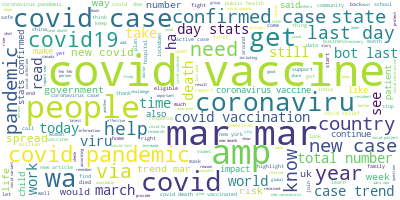

In [90]:
# Join the different processed titles together.
long_string = ','.join(list(decrease_df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=4, contour_color='steelblue', stopwords = stp)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

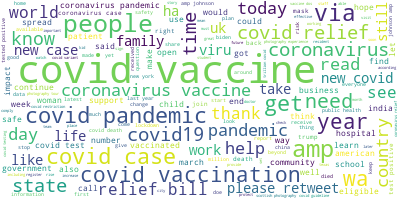

In [91]:
# Join the different processed titles together.
long_string = ','.join(list(increase_df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=4, contour_color='steelblue', stopwords = stp)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Increase in sentiment

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

documents = [tweet for tweet in increase_df.text]

no_features = 5000

# # NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english', ngram_range = (1, 2))
# tfidf = tfidf_vectorizer.fit_transform(documents)
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=no_features, stop_words='english', ngram_range = (1, 2))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 15

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 50
# print('NMF topics keywords')
# display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n\n\n\n\n\n LDA topics keywords')
display_topics(lda, tf_feature_names, no_top_words)







 LDA topics keywords
Topic 0:
family risk time safety government ontario life year check photography trial guideline experience taking covid appointment toronto 19 covid 19 tour future scottish booking later forced ford fact 2022 comply 19 guideline trudeau edinburgh scottish photography photography experience photography tour ontario canada antibody government covid yesterday actively later year paramount taking booking year 2022 guideline time outlander safety paramount comply government booking photography experience edinburgh
Topic 1:
mask like spread response safe coronavirus look did share measure social order face governor video big best watch don texas especially animal wear stop provide le help hand distance mandate critical wearing wear mask real looking public thought gym protect percent decision distancing gov germany restaurant 19 response follow air continue game
Topic 2:
vaccine dos astrazeneca amp surge million johnson use shot jab receive medical 12 country confi

In [93]:
print("Log likelihood: ", lda.score(tf))
print("Perplexity: ", lda.perplexity(tf))

Log likelihood:  -33622896.32996046
Perplexity:  1461.2107755317688


C:\Users\Ushah\anaconda3\envs\ushah\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


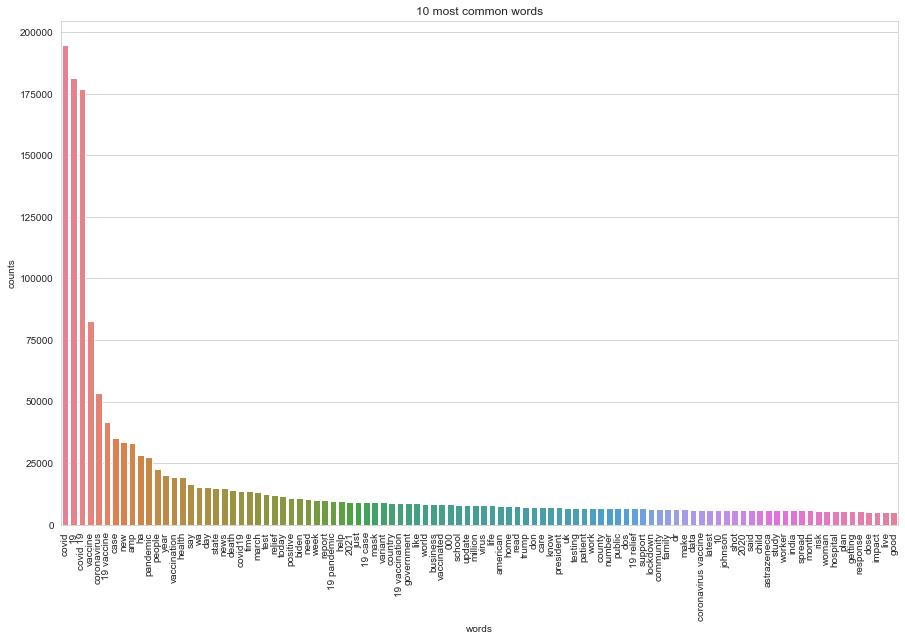

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:100]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
# tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english', ngram_range = (3, 3))
# tf = tf_vectorizer.fit_transform(documents)
#tf_feature_names = tf_vectorizer.get_feature_names()
# Visualise the 10 most common words
plot_10_most_common_words(count_data=tf, count_vectorizer=tf_vectorizer)

In [97]:
lda_output = lda.transform(tf)

increase_df['Topic'] = [np.argmax(x) for x in lda_output]

text_list = increase_df['full_text'].values
id_list = increase_df['id'].values
# column names
topicnames = ['Topic_' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc_' + str(i) for i in range(len(increase_df['text']))]

# create a dataframe
df_document_topic = pd.DataFrame(np.round(lda_output,2), columns=topicnames, index=docnames)
df_document_topic['Topic'] = increase_df['Topic'].values
df_document_topic['author_id'] = increase_df['author_id'].values
df_document_topic['text'] = text_list
df_document_topic['id'] = id_list
df_document_topic.head(20)

<ipython-input-97-28619d1db7ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_df['Topic'] = [np.argmax(x) for x in lda_output]


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic,author_id,text,id
Doc_0,0.01,0.01,0.01,0.01,0.11,0.20,0.01,0.01,0.01,0.19,0.01,0.44,0.01,0.01,0.01,11,1091857187935264769,new philippines covid-19 rules: pcr test scrap...,1366252122581393409
Doc_1,0.00,0.00,0.55,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,2,27095234,"covid-19 vaccine to arrive nigeria tomorrow, m...",1366252128361189377
Doc_2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.82,0.10,0.00,0.05,11,289118612,i wrote this book almost a yr ago. it's a comp...,1366252147554287616
Doc_3,0.00,0.03,0.00,0.03,0.64,0.00,0.00,0.12,0.00,0.00,0.00,0.12,0.03,0.00,0.00,4,814652508,more than 30 people tested positive for covid-...,1366252188771606529
Doc_4,0.00,0.08,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.00,0.08,0.00,11,37527604,nice to see national covid-19 immunisation pro...,1366252192160645123
Doc_5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.41,0.01,0.01,0.41,0.01,0.01,9,23390108,@davidbrodycbn can’t we all realize they want ...,1366252242140078086
Doc_6,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.07,0.00,0.11,0.00,0.57,0.07,0.00,0.00,11,406332199,'will help intensify fight': who welcomes indi...,1366252282757611521
Doc_7,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.89,0.00,0.00,0.00,11,3250463833,pm modi took his first dose of the #covid19 #...,1366252298955988994
Doc_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.10,9,1216988949169594368,"india reports 15,510 new covid-19 cases, 106 d...",1366252347022663683
Doc_9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.72,0.01,0.01,0.01,0.01,0.01,0.16,0.01,7,188603834,will a third wave of #covid19 hit b.c.? five t...,1366252496461516801


In [98]:
df_document_topic.to_csv('increase in sentiment.csv', index = False)

# Decrease

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

documents = [tweet for tweet in decrease_df.text]

no_features = 5000

# # NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english', ngram_range = (1, 2))
# tfidf = tfidf_vectorizer.fit_transform(documents)
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=no_features, stop_words='english', ngram_range = (1, 2))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 15

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 50
# print('NMF topics keywords')
# display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n\n\n\n\n\n LDA topics keywords')
display_topics(lda, tf_feature_names, no_top_words)







 LDA topics keywords
Topic 0:
case new death coronavirus 19 case report new case rate variant reported county day update number new covid daily news infection state today rise latest related 000 coronavirus case data record brazil ontario new coronavirus le remember germany antibody hospitalization france new death case covid ha highest health 24 10 called strain positivity yesterday researcher reporting coronavirus variant
Topic 1:
patient new article disease month covid infection new article cdc expert test way wa reason treatment severe 19 19 infection 19 test 19 patient won covid 19 evidence die man control source cancer clot dr director half based understand worry negative blood clot life result failure analysis release press heart killed mortality illness medical infectious listen
Topic 2:
amp ha health country public world read lockdown life care support need gt community public health story local worker blood despite rule real time science including policy economy thanks 

In [100]:
print("Log likelihood: ", lda.score(tf))
print("Perplexity: ", lda.perplexity(tf))

Log likelihood:  -24445034.33576011
Perplexity:  1327.6571622300262


C:\Users\Ushah\anaconda3\envs\ushah\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


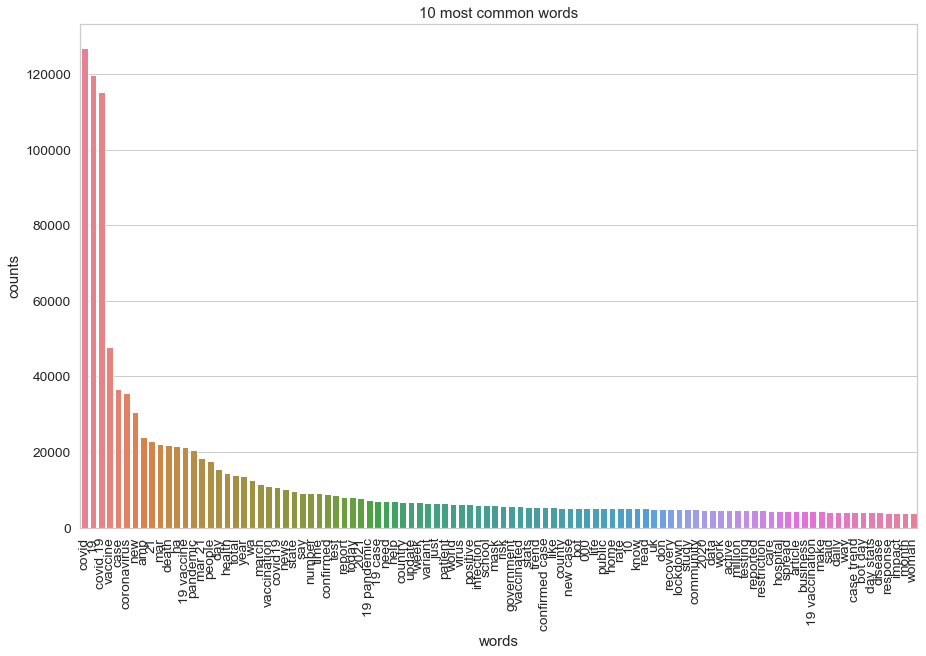

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:100]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
# tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english', ngram_range = (3, 3))
# tf = tf_vectorizer.fit_transform(documents)
#tf_feature_names = tf_vectorizer.get_feature_names()
# Visualise the 10 most common words
plot_10_most_common_words(count_data=tf, count_vectorizer=tf_vectorizer)

In [102]:
lda_output = lda.transform(tf)

decrease_df['Topic'] = [np.argmax(x) for x in lda_output]

text_list = decrease_df['full_text'].values
id_list = decrease_df['id'].values
# column names
topicnames = ['Topic_' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc_' + str(i) for i in range(len(decrease_df['text']))]

# create a dataframe
df_document_topic = pd.DataFrame(np.round(lda_output,2), columns=topicnames, index=docnames)
df_document_topic['Topic'] = decrease_df['Topic'].values
df_document_topic['author_id'] = decrease_df['author_id'].values
df_document_topic['text'] = text_list
df_document_topic['id'] = id_list
df_document_topic.head(20)

<ipython-input-102-d50fde1a44df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decrease_df['Topic'] = [np.argmax(x) for x in lda_output]


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic,author_id,text,id
Doc_0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.69,0.02,0.02,0.02,0.02,0.02,0.02,8,288217618,copper infused gloves destroy coronavirus http...,1366252178290184194
Doc_1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.17,0.21,0.55,0.01,13,1008837562604146688,"history’s deadliest pandemics: plague, smallpo...",1366252503680049159
Doc_2,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.01,0.01,0.01,0.01,0.01,0.75,0.01,0.11,12,1270637365451612162,prime minister @narendramodi took his first d...,1366252518783676417
Doc_3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.63,0.29,0.01,0.01,11,3538809437,pregnant anti-vaxxer threatens ‘bonk ban’ if h...,1366252541441437699
Doc_4,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.00,12,1270637365451612162,india begins the second phase of the world's l...,1366252601566580740
Doc_5,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,6,1248638149493846016,📍total #covid19 cases in india (as on march 01...,1366252660068737026
Doc_6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.78,0.09,13,2361630415,philadelphia: all adults will likely be vaccin...,1366252686769799168
Doc_7,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83,14,402616889,"the media talk about those who ""died from #cov...",1366252852381773825
Doc_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.76,0.00,0.00,0.00,0.00,0.20,0.00,0.00,7,1270637365451612162,the us food and drug administration on saturda...,1366252861483454468
Doc_9,0.21,0.27,0.01,0.01,0.01,0.01,0.01,0.01,0.44,0.01,0.01,0.01,0.01,0.01,0.01,8,717407278152957952,auckland coronavirus lockdown tests new zealan...,1366252893846831107


In [103]:
df_document_topic.to_csv('decrease in sentiment.csv', index = False)